# Week-4
Evalution metrics for classification problems. 

# Import modules

In [3]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load and pre-process Data - Model 

In [21]:
df = pd.read_csv('03_data-Telco-Customer-Churn.csv')

# Standardize column names 
df.columns = df.columns.str.lower().str.replace(' ','_')

# get list of categorical features
features_cat = list(df.dtypes[df.dtypes == 'object'].index)

# standardize categorical features data
for f in features_cat:
    df[f] = df[f].str.lower().str.replace(' ','_')
    
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)


df.churn = (df.churn == 'yes').astype('int')

In [22]:
# Train-Test-Split = 60-20-20
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [23]:
# Get y variables 
y_train = df_train.churn.values
y_val   = df_val.churn.values
y_test  = df_test.churn.values

# delete target from DF
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [24]:
# Numericals 
list_features_num = ['tenure', 'monthlycharges', 'totalcharges']

# Categoical 
list_features_cat = list(set(df_train_full.columns) - set(list_features_num) - set(['churn','customerid']))

list_features_num, list_features_cat

(['tenure', 'monthlycharges', 'totalcharges'],
 ['onlinesecurity',
  'dependents',
  'paymentmethod',
  'phoneservice',
  'multiplelines',
  'techsupport',
  'gender',
  'seniorcitizen',
  'paperlessbilling',
  'deviceprotection',
  'streamingtv',
  'partner',
  'streamingmovies',
  'internetservice',
  'contract',
  'onlinebackup'])

In [25]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[list_features_cat + list_features_num].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)


model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# validation 
val_dict = df_val[list_features_cat + list_features_num].to_dict(orient='records')
X_val = dv.transform(val_dict) 

y_pred = model.predict_proba(X_val)[:,1]

# Accuracy
churn_decision = (y_pred > 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

****

# Accuracy and dummy model 
- Evalute the model on different thresholds
- check the accuracy of dummy baselines

In [28]:
len(df_val)

1409

In [31]:
# sum to see no. of correct decisions
(y_val == churn_decision).sum(), len(y_val)

(1132, 1409)

In [30]:
# Accuracy
(y_val == churn_decision).sum() / len(y_val)

0.8034066713981547

Why use the churn threshold? 
- Change the threshold and test 

In [37]:
# testing different thresholds
thresholds = np.linspace(0, 1, 21)
scores = [] 

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    scores.append(score)
    print(f't={t:.2f} s={score:.3f}')

t=0.00 s=0.274
t=0.05 s=0.509
t=0.10 s=0.591
t=0.15 s=0.666
t=0.20 s=0.710
t=0.25 s=0.739
t=0.30 s=0.760
t=0.35 s=0.772
t=0.40 s=0.785
t=0.45 s=0.793
t=0.50 s=0.803
t=0.55 s=0.801
t=0.60 s=0.795
t=0.65 s=0.786
t=0.70 s=0.765
t=0.75 s=0.744
t=0.80 s=0.735
t=0.85 s=0.726
t=0.90 s=0.726
t=0.95 s=0.726
t=1.00 s=0.726


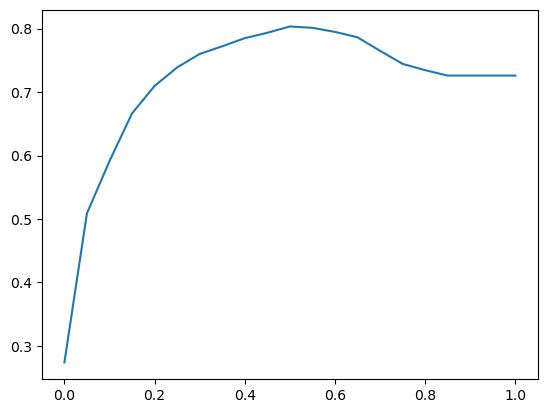

In [38]:
# Plot thresholds and plot s
plt.plot(thresholds, scores)

`Logistic Regression` tries to optimize in such a way that 0.5 is the best thresholds

In [44]:
# Scikit learn function for accuracy 
accuracy_score(y_val, y_pred > 0.5)

0.8034066713981547

- Customers are churning if the score is >1.0. Accuracy for this threshols is `73%`, which is less than `80% threshold=@0.5`.

- Our model = 80%
- Dummy model = 73%
- Why bother? 
    - 7% increase 
    - Accuracy doesn't completely tell everything about churning and non-churning

***

# Confusion table
- Different tyeps of errors and correct decisions
- Arranign them into a table

# Precision and Recall 

# ROC Curces 

## TPR and FRP 

## Random model 

## Ideal model 

# ROC-AUC

# Cross-Validation
- Evaluting same model on different subsets of data 
- Getting the average prediction and the spread within predictions. 